# Online store project 

I'm an analyst at a big online store. Together with the marketing department, I will compiled a list of hypotheses that may help boost revenue.
I need to prioritize these hypotheses, launch an A/B test, and analyze the results.

# Description of the data


**Data used in the first part of the project**


**/datasets/hypotheses_us.csv:**


- Hypotheses: brief descriptions of the hypotheses.


- Reach: user reach, on a scale of one to ten.


- Impact: impact on users, on a scale of one to ten.


- Confidence: confidence in the hypothesis, on a scale of one to ten.


- Effort: the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.


**Data used in the second part of the project**


**/datasets/orders_us.csv:**


- transactionId: order identifier.


- visitorId: identifier of the user who placed the order.


- date: of the order.


- revenue: from the order.


- group: the A/B test group that the user belongs to.


**/datasets/visits_us.csv:**


- date: date.


- group: A/B test group.


- visits: the number of visits on the date specified in the A/B test group specified.

# Part 1. Prioritizing Hypotheses


The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.

Let's import the library and load the data we will use in the first phase.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
import scipy.stats as stats

In [2]:
data = pd.read_csv('/datasets/hypotheses_us.csv')

In [3]:
data

,Hypothesis;Reach;Impact;Confidence;Effort
0,Add two new channels for attracting traffic. T...
1,Launch your own delivery service. This will sh...
2,Add product recommendation blocks to the store...
3,Change the category structure. This will incre...
4,Change the background color on the main page. ...
5,Add a customer review page. This will increase...
6,Show banners with current offers and sales on ...
7,Add a subscription form to all the main pages....
8,Launch a promotion that gives users discounts ...


Look like we have all our columns in just one column.
Let's split the data into the five columns that we need.

In [4]:
data[['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort']] = data['Hypothesis;Reach;Impact;Confidence;Effort'].str.split(';', expand=True)

In [5]:
data

,Hypothesis;Reach;Impact;Confidence;Effort,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,Launch a promotion that gives users discounts ...,1,9,9,5


Let's delete the original column.

In [6]:
data = data.drop(columns="Hypothesis;Reach;Impact;Confidence;Effort")

In [7]:
data

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [8]:
pd.set_option('display.max_colwidth', -1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null object
Impact        9 non-null object
Confidence    9 non-null object
Effort        9 non-null object
dtypes: object(5)
memory usage: 488.0+ bytes


The Hypothesis column can be an object data type, but the other columns need to be an integer to apply calculation n them. Also, let's make all the column names lower case.

In [10]:
data.columns= data.columns.str.lower()

In [11]:
data

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [12]:
data['reach']=data['reach'].astype('int')
data['impact']=data['impact'].astype('int')
data['confidence']=data['confidence'].astype('int')
data['effort']=data['effort'].astype('int')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
hypothesis    9 non-null object
reach         9 non-null int64
impact        9 non-null int64
confidence    9 non-null int64
effort        9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [14]:
data

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


Looking much better.
Let's look at whether we have multiple hypotheses.

In [15]:
data.hypothesis.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
Name: hypothesis, dtype: bool

In [16]:
data.hypothesis.value_counts()

Change the category structure. This will increase conversion since users will find the products they want more quickly    1
Add product recommendation blocks to the store's site. This will increase conversion and average purchase size            1
Add a customer review page. This will increase the number of orders                                                       1
Add a subscription form to all the main pages. This will help you compile a mailing list                                  1
Launch a promotion that gives users discounts on their birthdays                                                          1
Launch your own delivery service. This will shorten delivery time                                                         1
Change the background color on the main page. This will increase user engagement                                          1
Show banners with current offers and sales on the main page. This will boost conversion                                   1
Add two 

Nope.

**Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.**

In [17]:
data['ice_score'] = (data['impact'] * data['confidence']) / data['effort']
data

,hypothesis,reach,impact,confidence,effort,ice_score
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000


In [18]:
data_ice = data.sort_values(by='ice_score', ascending=False)
data_ice

,hypothesis,reach,impact,confidence,effort,ice_score
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000


We sorted our hypothesis by the ice score.

In [19]:
data_ice

,hypothesis,reach,impact,confidence,effort,ice_score
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000


Now we can see the entire width of the hypothesis column.

**Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.**

In [20]:
data['rice_score'] = (data['reach'] * data['impact'] * data['confidence']) / data['effort']
data

,hypothesis,reach,impact,confidence,effort,ice_score,rice_score
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2


In [21]:
data_rice = data.sort_values(by='rice_score', ascending=False)
data_rice

,hypothesis,reach,impact,confidence,effort,ice_score,rice_score
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0


We sorted the data by the RICE score.

**Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.**

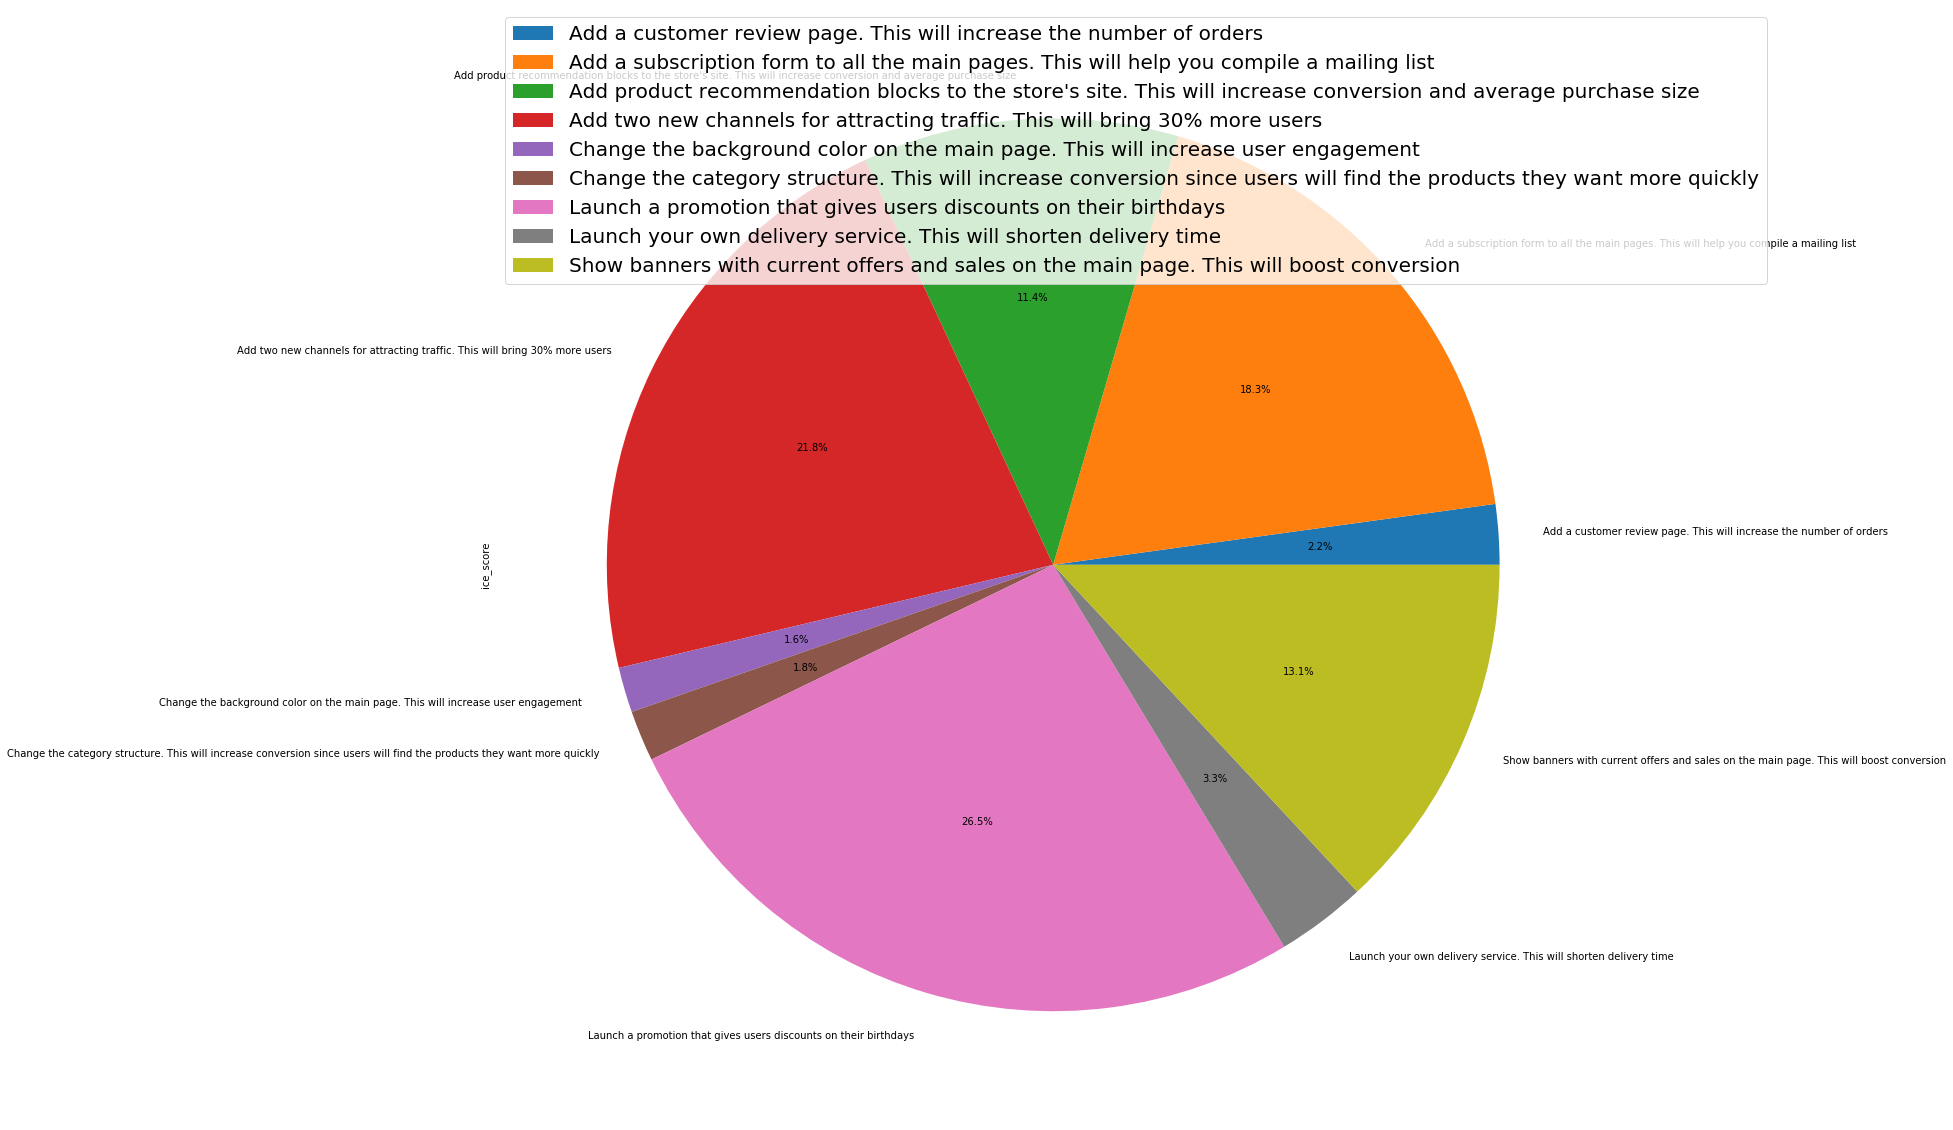

In [22]:
data.pivot_table(index='hypothesis', values='ice_score', aggfunc='sum').plot(kind='pie', y='ice_score', figsize=(20, 22), autopct='%1.1f%%')
plt.legend(loc='upper left', prop={'size': 20})
plt.show()

When we look at the ice data, hypothesis number one is:"Launch a promotion that gives users discounts on their birthdays 
hypothesis 2 is: "Add two new channels for attracting traffic. This will bring 30% more users."
Number 3 is: "Add a subscription form to all the main pages. This will help you compile a mailing list"

Let's look at the data from the RICE score prioritization.

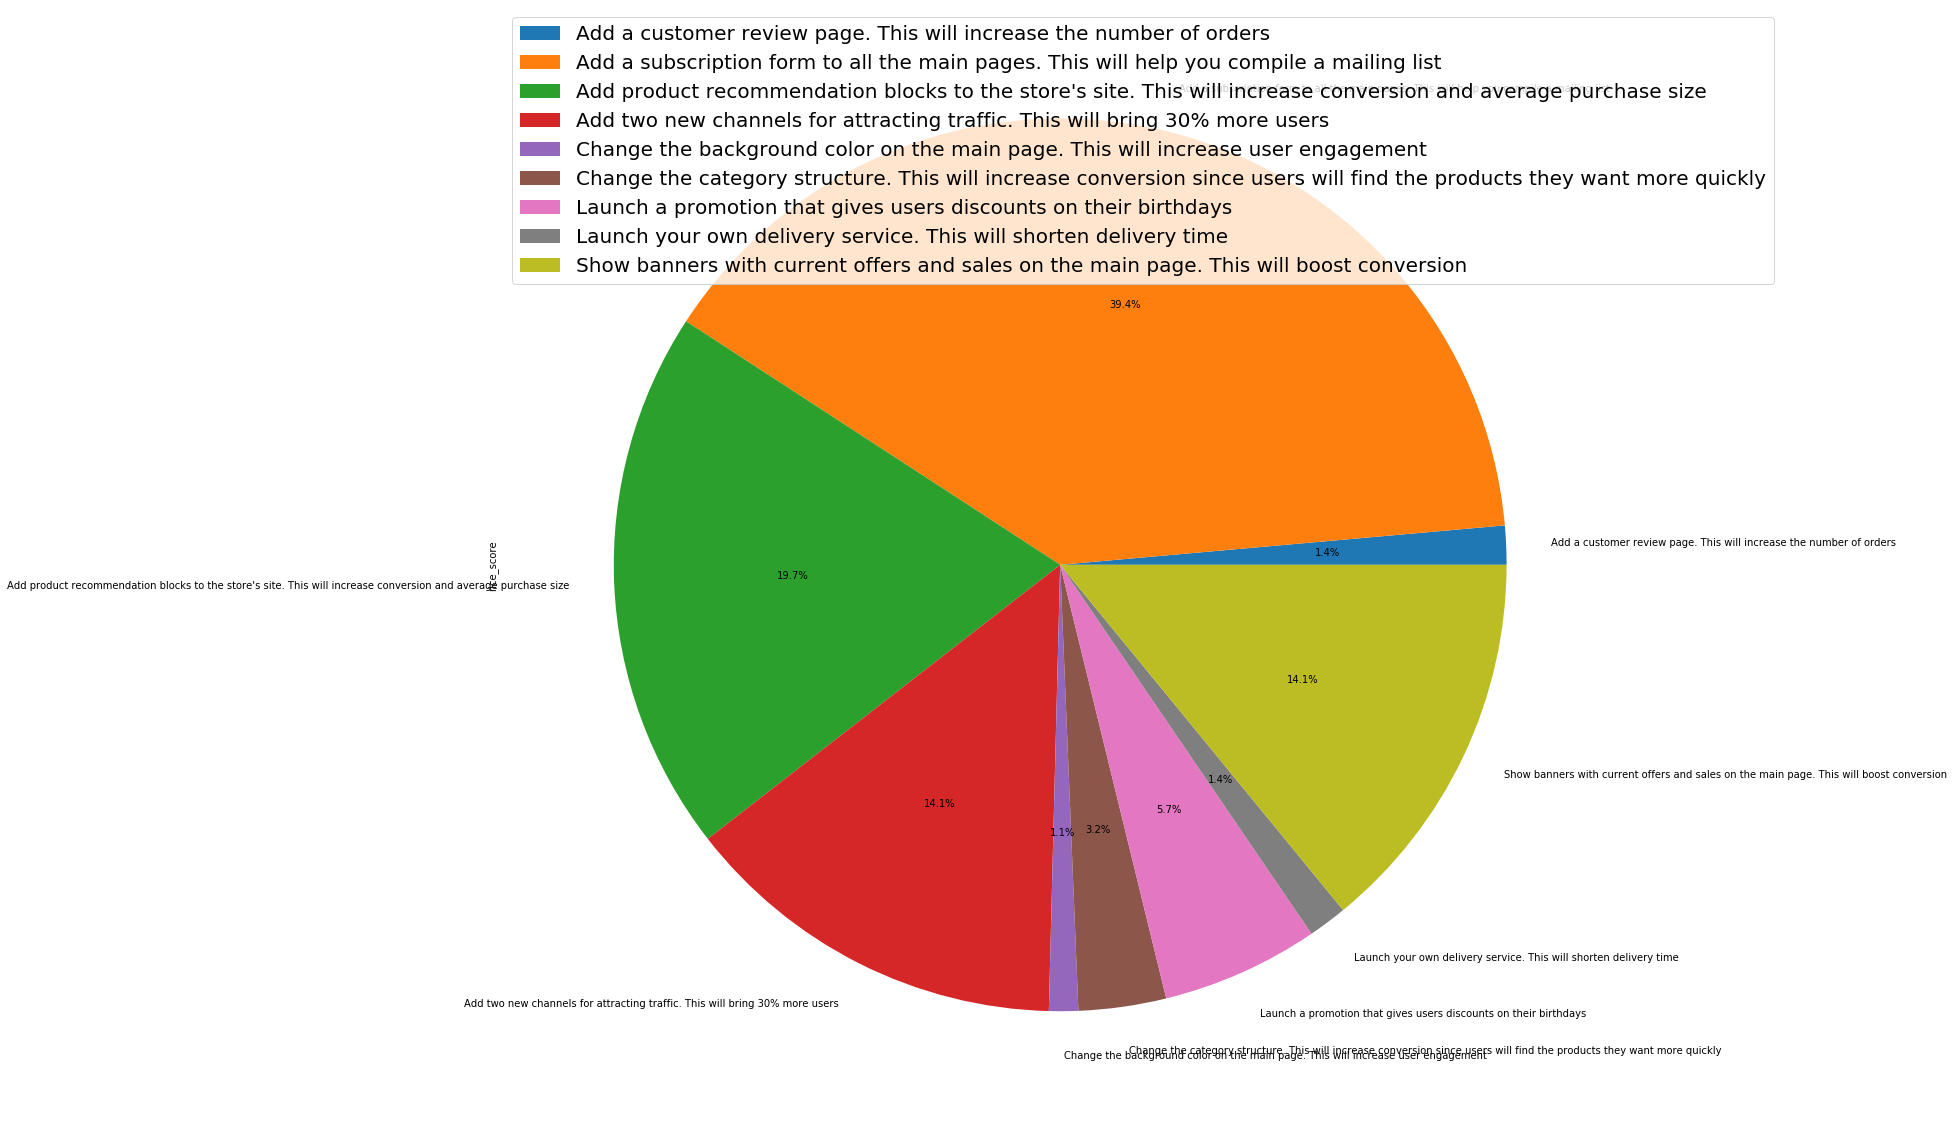

In [23]:
data.pivot_table(index='hypothesis', values='rice_score', aggfunc='sum').plot(kind='pie', y='rice_score', figsize=(20, 22), autopct='%1.1f%%')
plt.legend(loc='upper left', prop={'size': 20})
plt.show()

The number one hypothesis is: Add a subscription form to all the main pages. This will help you compile a mailing list.
Hypothesis number 2 is "Add product recommendation blocks to the store's site. This will increase conversion and average purchase size."
Hypothesis number 3 is "Add two new channels for attracting traffic. This will bring 30% more users."

# Part 2. A/B Test Analysis


You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.

Let's load the data and study the general information. 

In [24]:
orders_us = pd.read_csv('/datasets/orders_us.csv')

In [25]:
visits_us = pd.read_csv('/datasets/visits_us.csv')

In [26]:
orders_us.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [27]:
orders_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


We will need to change the data type on the date column to a date-time. Let's check for duplicated values.

In [28]:
orders_us.transactionId.duplicated().value_counts()

False    1197
Name: transactionId, dtype: int64

In [29]:
orders_us.visitorId.duplicated().value_counts()

False    1031
True     166 
Name: visitorId, dtype: int64

In [30]:
orders_us.date.duplicated().value_counts()

True     1166
False    31  
Name: date, dtype: int64

In [31]:
orders_us.revenue.duplicated().value_counts()

True     794
False    403
Name: revenue, dtype: int64

In [32]:
orders_us.group.duplicated().value_counts()

True     1195
False    2   
Name: group, dtype: int64

In [33]:
orders_us.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


In [34]:
visits_us.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [35]:
visits_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [36]:
visits_us.group.duplicated().value_counts()

True     60
False    2 
Name: group, dtype: int64

In [37]:
visits_us.date.duplicated().value_counts()

True     31
False    31
Name: date, dtype: int64

In [38]:
visits_us.visits.duplicated().value_counts()

False    58
True     4 
Name: visits, dtype: int64

In [39]:
visits_us.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [40]:
orders_us.head(1)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B


In [41]:
orders_us[orders_us.duplicated(['visitorId', 'group'])]

,transactionId,visitorId,date,revenue,group
91,3176574859,2742574263,2019-08-22,275.9,B
95,372616894,457167155,2019-08-22,20.2,B
98,1962247337,2706377257,2019-08-01,110.7,A
112,1638982251,3062433592,2019-08-01,135.3,B
118,4233533907,2378935119,2019-08-22,55.2,A
...,...,...,...,...,...
1172,3898641900,3803269165,2019-08-14,15.2,B
1175,1373388206,3717692402,2019-08-14,40.9,B
1182,2682156369,1668030113,2019-08-14,20.8,B
1189,4082620617,393266494,2019-08-14,490.4,B


Let's look for duplicated values in all of the rows in our data.

In [42]:
orders_us.duplicated().sum()

0

nan

Let's look at the total duplicated user in groups A and B.

In [43]:
orders_us.duplicated(subset=['visitorId', 'group']).sum()

108

108

Let's drop them from the data.

In [44]:
orders_us = orders_us.drop_duplicates(subset=['visitorId', 'group'])

Let's cack again.

In [45]:
orders_us.duplicated(subset=['visitorId', 'group']).sum()

0

Nan

Let's change the columns to their correct data type.

In [46]:
visits_us['date'] = visits_us['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [47]:
orders_us['date'] = orders_us['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [48]:
orders_us['transactionId'] = orders_us['transactionId'].astype('uint64')

In [49]:
orders_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1089 non-null uint64
visitorId        1089 non-null int64
date             1089 non-null datetime64[ns]
revenue          1089 non-null float64
group            1089 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), uint64(1)
memory usage: 51.0+ KB


Let's make a new DataFrame with cumulative data:

In [50]:
# getting aggregated cumulative daily data on orders 
ordersAggregated = orders_us.apply(lambda x: orders_us[np.logical_and(orders_us['date'] <= x['date'], orders_us['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# getting aggregated cumulative daily data on visitors  
visitorsAggregated = visits_us.apply(lambda x: visits_us[np.logical_and(visits_us['date'] <= x['date'], visits_us['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

# merging the two tables into one and giving its columns descriptive names
cumlativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumlativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [51]:
cumlativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,20,20,2040.2,719
1,2019-08-01,A,20,20,2040.2,719
2,2019-08-01,A,20,20,2040.2,719
3,2019-08-01,A,20,20,2040.2,719
4,2019-08-01,A,20,20,2040.2,719


**Analyze the A/B test:**

**1) Graph cumulative revenue by group. Make conclusions and conjectures.**

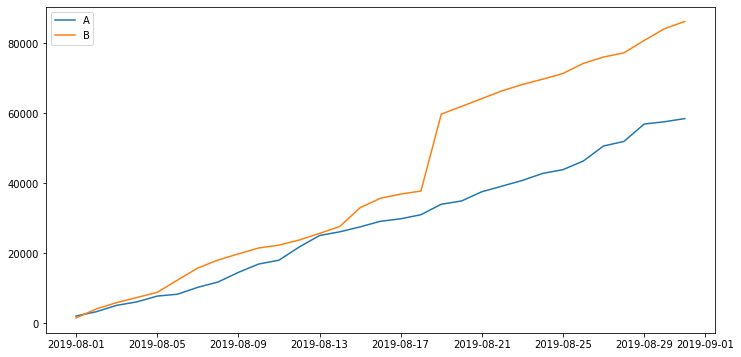

In [52]:
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumlativeData[cumlativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumlativeData[cumlativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12,6))
# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.show()

The cumulative revenue for the two groups starts moving up at the same rate. But through the second half of the month, group B started opening a gap from group A but still maintained the same rate.

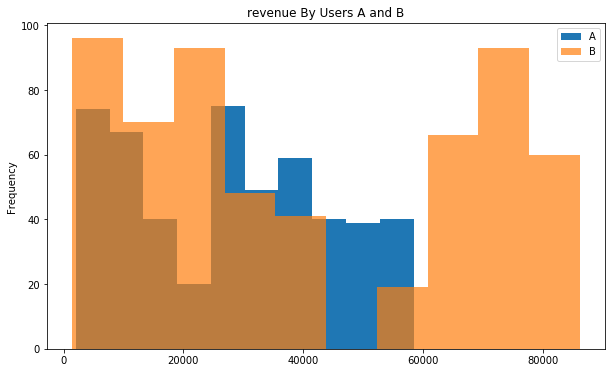

In [53]:
plt.figure(figsize=(10,6))
cumulativeRevenueA['revenue'].plot(kind='hist', label='A', title='revenue By Users A and B')
cumulativeRevenueB['revenue'].plot(kind='hist', alpha=0.7, label='B')
plt.legend()
plt.show()

There are more users in group B but also more revenue.

In [54]:
cumulativeRevenueA['revenue'].describe()

count    503.000000  
mean     27965.308350
std      17179.969818
min      2040.200000 
25%      11003.700000
50%      27512.500000
75%      40791.500000
max      58453.200000
Name: revenue, dtype: float64

In [55]:
cumulativeRevenueB['revenue'].describe()

count    586.000000  
mean     41025.830375
std      28217.480586
min      1484.700000 
25%      18042.400000
50%      32992.500000
75%      69719.400000
max      86211.100000
Name: revenue, dtype: float64

cumulative revenue of the two groups is pretty close, but group b is won. Avg revenue of group B is higher, and the user in group B is more varied with an std of 30097.

**2) Graph cumulative average order size by group. Make conclusions and conjectures.**

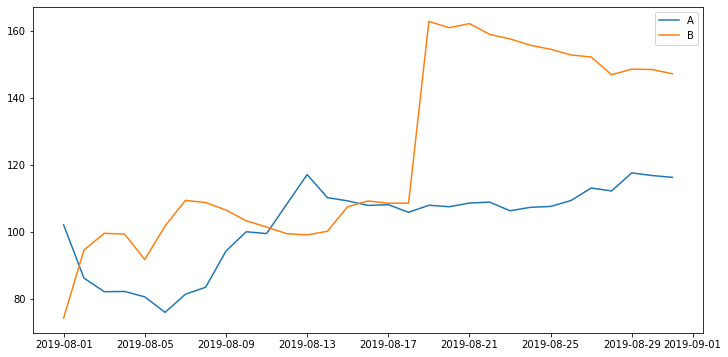

In [56]:
plt.figure(figsize=(12,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Once again everything is correct here and the same comments as above.

 The Cumulative average order size of group B is much higher in almost every word of the month.

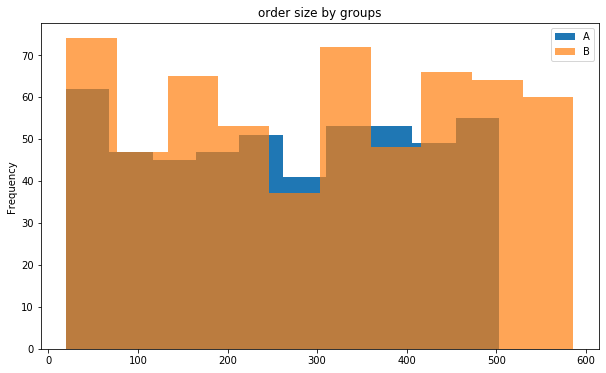

In [57]:
plt.figure(figsize=(10,6))
cumulativeRevenueA['orders'].plot(kind='hist', label='A', title='order size by groups')
cumulativeRevenueB['orders'].plot(kind='hist', alpha=0.7, label='B')
plt.legend()
plt.show()

In [58]:
cumulativeRevenueA['orders'].describe()

count    503.000000
mean     260.349901
std      145.090811
min      20.000000 
25%      133.500000
50%      252.000000
75%      384.000000
max      503.000000
Name: orders, dtype: float64

In [59]:
cumulativeRevenueB['orders'].describe()

count    586.000000
mean     303.069966
std      169.003121
min      20.000000 
25%      166.000000
50%      307.000000
75%      448.000000
max      586.000000
Name: orders, dtype: float64

The mean of the cumulative avg order in group B is 330.953125, and for the group, A it is 288.145422.

**3) Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.**

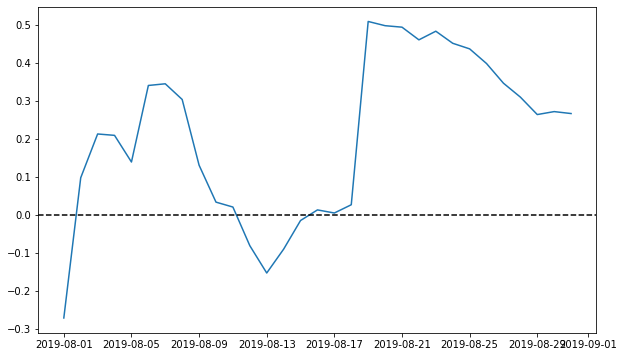

In [60]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,6))
# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--')

plt.show()

**4) Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.**

In [61]:
cumlativeData.head(1)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,20,20,2040.2,719


We will create data frames for each group. Divide buyers from the numbers of visits and plot a graph to the two data frames.

In [62]:
cumulativA = cumlativeData[cumlativeData['group']=='A'][['date','revenue', 'orders', 'buyers', 'visitors']]

In [63]:
cumulativB = cumlativeData[cumlativeData['group']=='B'][['date','revenue', 'orders', 'buyers', 'visitors']]

In [64]:
cumulativA['conversion']=cumulativA['buyers']/cumulativA['visitors']
cumulativB['conversion']=cumulativB['buyers']/cumulativB['visitors']

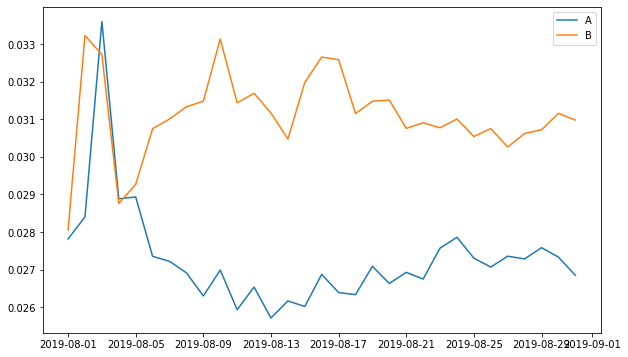

In [65]:
plt.figure(figsize=(10,6))
plt.plot(cumulativA['date'], cumulativA['conversion'], label='A')
plt.plot(cumulativB['date'], cumulativB['conversion'], label='B')
plt.legend()
plt.show()

In [66]:
# gathering the data into one DataFrame
mergedCumulativeconversion = cumulativA.merge(cumulativB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeconversion.head(1)

,date,revenueA,ordersA,buyersA,visitorsA,conversionA,revenueB,ordersB,buyersB,visitorsB,conversionB
0,2019-08-01,2040.2,20,20,719,0.027816,1484.7,20,20,713,0.02805


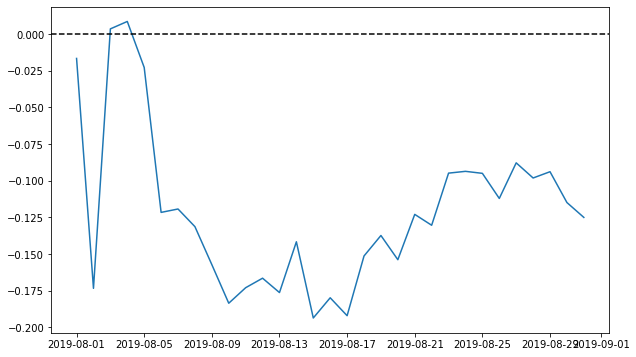

In [67]:
plt.figure(figsize=(10,6))
# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeconversion['date'], (mergedCumulativeconversion['visitorsB']/mergedCumulativeconversion['conversionB'])/(mergedCumulativeconversion['visitorsA']/mergedCumulativeconversion['conversionA'])-1)

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--')

plt.show()

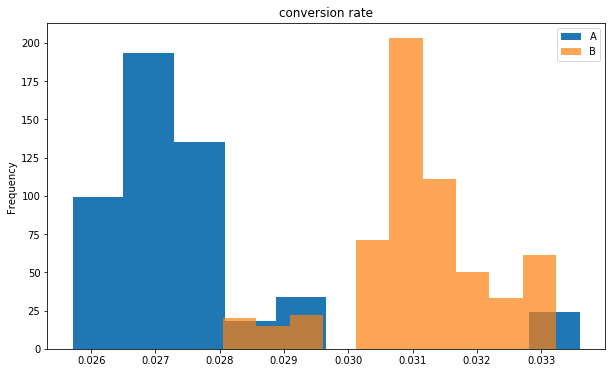

In [68]:
plt.figure(figsize=(10,6))
cumulativA['conversion'].plot(kind='hist', label='A', title='conversion rate')
cumulativB['conversion'].plot(kind='hist', alpha=0.7, label='B')
plt.legend()
plt.show()

In the beginning, the conversion rate of each group spikes, but then it goes down. And after that group, the B conversion rate goes up, and group A goes down. But to make it clear that there isn't a big gap between the two groups.

In [69]:
cumulativA['conversion'].describe()

count    503.000000
mean     0.027443  
std      0.001575  
min      0.025712  
25%      0.026631  
50%      0.027087  
75%      0.027583  
max      0.033604  
Name: conversion, dtype: float64

In [70]:
cumulativB['conversion'].describe()

count    586.000000
mean     0.031137  
std      0.001123  
min      0.028050  
25%      0.030750  
50%      0.031008  
75%      0.031511  
max      0.033230  
Name: conversion, dtype: float64

The median conversion rate for group B is 3.16%, and for group A it is 2.75%.

**5) Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.**

In [71]:
orders_us.head(1)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B


Let's find the number of orders per user

In [72]:
ordersByUsers = (
    orders_us.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
639,2654030115,2
932,3891541246,2
950,3941795274,2
340,1404934699,2
84,351125977,2
954,3951559397,2
710,2927087541,2
958,3963646447,2
591,2458001652,2
960,3972127743,2


There are users with 5, 8, 9, and 11 orders. That's a lot.
Let's plot a scatter chart with the number of orders per user:

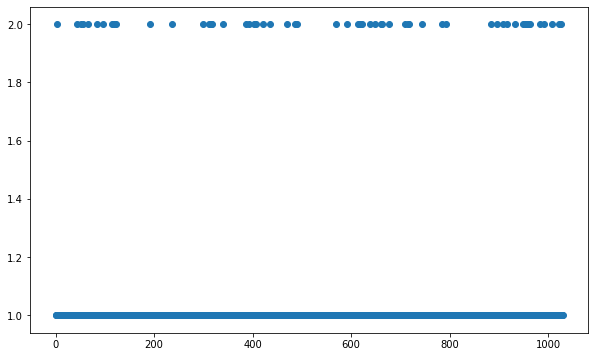

In [73]:
plt.figure(figsize=(10,6))

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.show()

The majority of customers placed only one order. However, a significant share placed 2 to 3.

**6) Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.**

In [74]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 2.])

No more than 5% of users placed more than 2.(somthing) orders, and No more than 1% of users placed more than 4.(somthing).
Thus, it would be reasonable to set 3 orders per user as the lower limit for the number of orders

**7) Plot a scatter chart of order prices. Make conclusions and conjectures.**

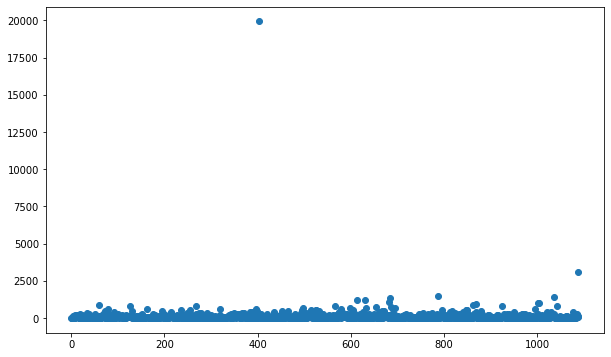

In [75]:
plt.figure(figsize=(10,6))

x_values = pd.Series(range(0, len(orders_us['revenue'])))
plt.scatter(x_values, orders_us['revenue'])
plt.show()

there are several big orders. Based on the graph, we can set the limit for the orders between 0 and 1250.

**8) Plot a scatter chart of order prices. Make conclusions and conjectures.**

In [76]:
np.percentile(orders_us['revenue'], [1, 5, 95, 99])

array([  5.5  ,   5.9  , 431.66 , 908.704])

 we can set the limit for the orders to 1,000

**9) Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.**

**H0 (Null): there is no significant difference in conversion between the groups**

**H1 (Alternative): there is significant difference in conversion between the groups**

We will need additional libraries for this.

In [77]:
import math
from scipy import stats

In [78]:
visits_us.head(1)

,date,group,visits
0,2019-08-01,A,719


In [79]:
orders_us.head(1)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B


Let's create new data frames for visits and orders in groups A and B.

Then we will sum up all visits and divide them by the unique order (revenue).

In [80]:
A_visit=visits_us[visits_us['group'] == 'A']
A_order=orders_us[orders_us['group'] == 'A']

In [81]:
A_trials=A_visit['visits'].sum()
print("Trials:",A_trials)
A_successes=A_order['revenue'].nunique()
print("Successes:",A_successes)

Trials: 18736
Successes: 261


In [82]:
B_visit=visits_us[visits_us['group'] == 'B']
B_order=orders_us[orders_us['group'] == 'B']

In [83]:
B_trials=B_visit['visits'].sum()
print("Trials:",B_trials)
B_successes=B_order['revenue'].nunique()
print("Successes:",B_successes)

Trials: 18916
Successes: 272


Now that we find trials and successes in each group, we will use an additional method to calculate the significant difference between the two populations.

In [84]:
from statsmodels.stats.proportion import proportions_ztest
stat, pval = proportions_ztest([A_successes,B_successes], [A_trials,B_trials])
print('{0:0.3f}'.format(pval))

0.712


The p-value is 0.712 wihch is bigger then 5%. so we cant reject H0

**10) Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.**

**H0 (Null):  that there is no significant difference in average order size between the groups**

**H1 (Alternative): there is significant difference in average order size between the groups**

to find the statistical significance of the difference in average order size, we'll pass the data on revenue to the mannwhitneyu() criterion

In [85]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders_us[orders_us['group']=='A']['revenue'], orders_us[orders_us['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders_us[orders_us['group']=='B']['revenue'].mean()/orders_us[orders_us['group']=='A']['revenue'].mean()-1)) 

0.466
0.266


The p-value is 0.466 so we cant reject H0, the difference between the segments is 25%

**11) Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.**

**H0 (Null): there is no significant difference in conversion between the groups**

**H1 (Alternative): there is significant difference in conversion between the groups**

In [86]:
orders_us.head(1)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B


In [87]:
visits_us.head(1)

,date,group,visits
0,2019-08-01,A,719


Let's filter the data from the outliers that we find.

In [88]:
orders_us_filtered = orders_us[orders_us['revenue'] < 1250]

Let's create data frames for each group.

In [89]:
ordersByUsersA = orders_us_filtered[orders_us_filtered['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders_us_filtered[orders_us_filtered['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']



In [90]:
ordersByUsersA.head(1)

,userId,orders
0,8300375,1


Now let's filter outliers from the number of orders per user.

In [91]:
ordersByUsersA= ordersByUsersA[ordersByUsersA['orders'] <= 3]
ordersByUsersB= ordersByUsersB[ordersByUsersB['orders'] <= 3]

Let's create two samples and run the Mann-Whitney U test to look different between the two distributions and then find statistical significance in the conversion rate between the groups.

In [92]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits_us[visits_us['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits_us[visits_us['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.009
0.153


The first row of the output gives us the p-value, 0.009, which is less than 0.05. So we reject the null hypothesis that there's not a statistically significant difference in conversion between the groups.the relative win of group B is 15% (the second row of the output).

**12) Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.**

**H0 (Null): there is no significant difference in average order size between the groups using the filtered data**

**H1 (Alternative): there is significant difference in average order size between the groups using the filtered data**

In [93]:
orders_us_filtered.head(1)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B


In [94]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders_us_filtered[orders_us_filtered['group']=='A']['revenue'], orders_us_filtered[orders_us_filtered['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders_us_filtered[orders_us_filtered['group']=='B']['revenue'].mean()/orders_us_filtered[orders_us_filtered['group']=='A']['revenue'].mean()-1)) 

0.453
-0.044


The p-value is pretty higher than 0.05, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups. Nonetheless, the average order size for group B is than it is for group A.

**13) Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.**

Based on that A/B test, my conclusion is that group B is the leader, and we should stop the test.

Based on that A/B test, we can absorb that the average order size of groups A and B is not so different.
 But on the other hand, the conversion is different. group B he's more conversion.
Group B he's a bit better conversion rate.
Group B generates more revenue for the company.
 And because of that, my conclusion is that group B is the leader, and we should stop the test.